# Problem 1. Fluctuations and KL Divergence

## 1.1

Here after, $f$ as the lower index denotes that the indexed function is understood in the sense of fluctuations $\Delta r(w) = r(w) - <r>^a$ as the RV. For example, $G_f(k)$ is the characteristic function of fluctuations.

![Handwritten solution. Contact me if unavailable](1.1.jpg)

## 1.2

![Handwritten solution. Contact me if unavailable](1.2.jpg)

## 1.3

![Handwritten solution. Contact me if unavailable](1.3.jpg)

## 1.4

![Handwritten solution. Contact me if unavailable](1.4.jpg)

## 1.5

![Handwritten solution. Contact me if unavailable](1.5.1.jpg)

![Handwritten solution. Contact me if unavailable](1.5.2.jpg)

# Problem 2: MLE with scipy.minimize

One needs to find which source distribution was most likely used to generate `unknown_sample.txt`

- Gamma distribution, where $k$ is shape, $\theta = 1$ is scale, $\Gamma$ is Gamma function

$$p_{gamma}(x) = x^{k-1} \ \frac{e^{-x/\theta}}{\theta^k \ \Gamma(k)}$$


- or Gumbel distribution, where $\mu$ is the mode, and $\beta=1$ is the scale

$$ p_{gumbel}(x) = \frac{e^{-(x - \mu)/ \beta}}{\beta} e^{ -e^{-(x - \mu)/ \beta}} $$


In this task we ask you to use `scipy.minimize` to maximize $\log L$, i.e. minimize its negative value.
Scale parameters $\theta$ and $\beta$ here are constant and equal to 1 for both distributions, so you can simpify PDFs.

### Restoring the true distribution
Write down the likelihood $L$ and  the negative log-likelihood  for $p_{gamma}(x, k)$, $p_{gumbel}(x, \mu)$ and sample $x = \{x_0, ..., x_n\}$



In the code block below sample `x` is already imported as a global variable. Implement `neg_loglikelihood_gamma` as a function of $k$ and `neg_loglikelihood_gumbel` as a function of $\mu$. Use numpy and scipy.special where needed.

Run the minimizer with given initial parameters using this call

    result = minimize(func, init_param, method = 'Nelder-Mead', options={'disp': True})

Check the result. Answer the following questions

1. What is the most probable value of shape $\hat{k}$ if the distribution was $p_{gamma}$?


2. What is the most probable value of mode $\hat{\mu}$ if the distribution was $p_{gumbel}$?


3. Which distribution has the highest probability to be the true one?

Ensure that your solution is correct by plotting both PDFs with found $\hat{k}$ and $\hat{\mu}$ over the histogram of the sample.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import minimize

In [14]:
x = np.loadtxt('unknown_sample.txt')

neg_log_likelihood_gamma = lambda k: -((k - 1) * np.log(x) - x - np.log(scipy.special.gamma(k))).sum()
neg_log_likelihood_gumbel = lambda mu: ((x - mu) + np.exp(-(x - mu))).sum()

gamma_k0 = 0.1
gumbel_mu0 = 0.1

In [15]:
res_gamma = minimize(neg_log_likelihood_gamma, gamma_k0, method='Nelder-Mead', options={'disp': True})
res_gamma

Optimization terminated successfully.
         Current function value: 1556.225845
         Iterations: 22
         Function evaluations: 44


 final_simplex: (array([[2.16945313],
       [2.16953125]]), array([1556.22584461, 1556.22584537]))
           fun: 1556.2258446071746
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 22
        status: 0
       success: True
             x: array([2.16945313])

In [16]:
res_gumbel = minimize(neg_log_likelihood_gumbel, gumbel_mu0, method='Nelder-Mead', options={'disp': True})
res_gumbel

Optimization terminated successfully.
         Current function value: 1552.163758
         Iterations: 21
         Function evaluations: 42


 final_simplex: (array([[1.539375  ],
       [1.53945313]]), array([1552.16375829, 1552.16375987]))
           fun: 1552.1637582858993
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([1.539375])

For gamma distribution, the most probable value of shape $\hat{k} = 2.17$ with negative log-likelihood equal to $1556$. For gumbel distribution, the most probable value of mode $\hat{\mu} = 1.54$ with negative log-likelihood equal to $1552$. Gumbel distribution is more likely to be the true distribution because it has less value of negative log-likelihood.

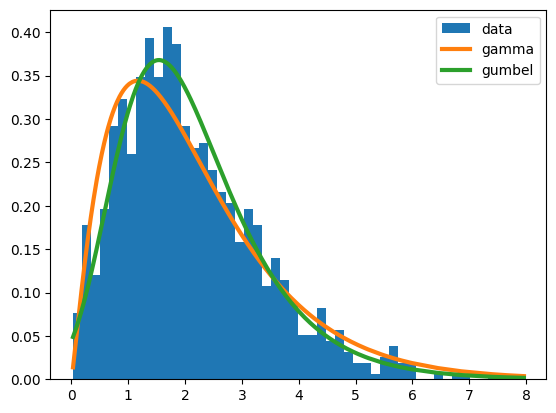

In [17]:
gamma_distr = lambda x, k: x**(k - 1) * np.exp(-x) / scipy.special.gamma(k)
gumbel_distr = lambda x, mu: np.exp(-(x - mu)) * np.exp(-np.exp(-(x - mu)))

k_opt = res_gamma.x.item()
mu_opt = res_gumbel.x.item()

x_sorted = np.sort(x)

plt.hist(x, bins=50, density=True, label='data')
plt.plot(x_sorted, gamma_distr(x_sorted, k_opt), label='gamma', lw=3)
plt.plot(x_sorted, gumbel_distr(x_sorted, mu_opt), label='gumbel', lw=3)
plt.legend();

### Automatic differentiation

Some optimization methods like BFGS (Broyden–Fletcher–Goldfarb–Shanno) use first and second order derivatives of given function. To simplify calculations of gradients, jacobians and hessians, we are going to employ an autograd package, able to differentiate native python and numpy code. 

Package: https://github.com/HIPS/autograd

This package is a "drop-in" replacement for many numpy and some scipy methods. To check what special functions are supported you need to look through [the source code](https://github.com/HIPS/autograd/blob/master/autograd/scipy/special.py) of correspondent module.

Automatic differentiation (autograd) mechanics is not a numerical approximations (a.k.a finite difference methods). Instead of this, using chain rules of differentiation it tracks every elementary operation performed on input data and stores a gradient as a numerical value.

- examples of computational graphs\
  https://en.wikipedia.org/wiki/Automatic_differentiation
  

- explanation of autograd mechanics\
  https://github.com/HIPS/autograd/blob/master/docs/tutorial.md#whats-going-on-under-the-hood
  

There are other framework with similar abilities, for instance 
[PyTorch](https://pytorch.org/), 
[JAX](https://github.com/google/jax) (successor of autograd), 
[TensorFlow](https://www.tensorflow.org/), 
[Theano](https://github.com/Theano/Theano), 
[MATLAB](https://www.mathworks.com/help/deeplearning/ug/include-automatic-differentiation.html) and even
[StalinGRAD](https://github.com/Functional-AutoDiff/STALINGRAD) :)

To install autograd in your conda/venv environment (my is called `base`) run

`(base) $ pip install autograd`

Look through example below and check that native differentiation works with Cobb-Douglas production function

$$ f(x, y) = x^{0.8} \ y^{0.2} $$

In [18]:
from autograd import grad

def f(x, y):
    return x**.8 * y**.2

def f_x(x, y):
    return .8 * x**-.2 * y**.2

def f_y(x, y):
    return .2 * x**.8 * y**-.8


# first derivatives for f(x,y), x is position 0 (default) and y is 1
dfdx = grad(f)
dfdy = grad(f, 1)

# suppose values for x and y are as follows
x, y = 2.0, 3.0

# evaluate the grads at x, y
print(f"autograd : {[dfdx(x,y), dfdy(x,y)]}")

# compare with analytical derivatives
print(f"analytical: {[f_x(x,y), f_y(x,y)]}")

autograd : [0.867577416958159, 0.14459623615969314]
analytical: [0.8675774169581589, 0.14459623615969314]


Defining a function using only np & scipy fundamental methods will make it autograd ready. Note that we need to run import statements again to rewrite references.

Take the code from the previous part and run BFGS optimization in the block below by calling
    
    minimize(func, init_param, jac=None, method = 'BFGS', options={'disp': True})
                     
Then provide optimizer with jacobians instead of `jac=None`. Use `jacobian` and `hessian` functions in the same way with `grad`.

Answer the following questions

4. Is there any difference between running the BFGS optimizer with and without a jacobian?


5. Do you spot any changes in an iterations number between BFGS and Nelder-Mead optimizers?

In [19]:
import autograd.numpy as np
import autograd.scipy as scipy
from autograd import jacobian, hessian

neg_log_likelihood_gamma = lambda k: -((k - 1) * np.log(x) - x - np.log(scipy.special.gamma(k))).sum()
neg_log_likelihood_gumbel = lambda mu: ((x - mu) + np.exp(-(x - mu))).sum()

In [21]:
minimize(neg_log_likelihood_gamma, gamma_k0, method='BFGS', options={'disp': True}, jac=None)

Optimization terminated successfully.
         Current function value: 1.244860
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 9


      fun: 1.2448602742366435
 hess_inv: array([[2.01236401]])
      jac: array([-7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([2.47968601])

In [27]:
minimize(neg_log_likelihood_gumbel, gumbel_mu0, method='BFGS', options={'disp': True}, jac=None)

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


      fun: 1.0000000000000178
 hess_inv: array([[1.00179461]])
      jac: array([1.93715096e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([2.00000019])

In [28]:
minimize(neg_log_likelihood_gamma, gamma_k0, method='BFGS', options={'disp': True}, jac=jacobian(neg_log_likelihood_gamma))

Optimization terminated successfully.
         Current function value: 1.244860
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


      fun: 1.2448602742366264
 hess_inv: array([[2.01236679]])
      jac: array([-7.01819649e-07])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([2.47968603])

In [29]:
minimize(neg_log_likelihood_gumbel, gumbel_mu0, method='BFGS', options={'disp': True}, jac=jacobian(neg_log_likelihood_gumbel))

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8


      fun: 1.0000000000000195
 hess_inv: array([[1.00179905]])
      jac: array([1.98153109e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([2.0000002])

When using BFGS optimizer without jacobian, one can notice that we need 2 times more function evaluations because the jacobian is estimated numerically using 2-point finite differences, according to scipy docs. Hence, it is better to provide jacobian for both computational efficiency and accuracy (avoid round-off errors in finite differences).

There is also big difference between Nelder-Mead and BFGS in terms of iteration number. BFGS requires less iterations (8 vs 22 and 6 vs 21). It is not surprising because Nelder-Mead is a simplex, gradient-free method, and gradient-free optimization methods are known to require more iterations to converge than gradient-based methods.

# Problem 3. Markov chains

## 3.1

![Handwritten solution. Contact me if unavailable](3.1.jpg)

## 3.2

![Handwritten solution. Contact me if unavailable](3.2.jpg)

Reference for Toeplitz eigenvectors expression: http://www.math.kent.edu/~reichel/publications/toep3.pdf (page 3)